In [1]:
import matplotlib.pyplot as plt
import csv
import os

import villas.dataprocessing.readtools as rt
import villas.dataprocessing.timeseries as ts
import villas.dataprocessing.plottools as pt
import villas.dataprocessing.validationtools as vt

### Read DPsim files

In [2]:
# Set path to file
path = '../benchmarks/graphs/'
fileName = '1_dpsim'
resultFile = path + fileName + '.csv'

# Returns list of timeseries-objects
ts_dpsim = rt.read_timeseries_dpsim(resultFile)

column number: 15
results length: 30
real column names: []
complex column names: ['ECS.i', 'ECS.v', 'LOAD5.i', 'LOAD5.v', 'LOAD6.i', 'LOAD6.v', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']


### Read DistAIX files

In [3]:
# Change file to distaix path
fileName = '1_distaix'
resultFile = path + fileName + '.csv'
resultFileFitted = path + fileName + '_temp.csv'

As DistAIX uses different headers, those have to be adapted to be used by villas.dataprocessing

In [4]:
with open(resultFile, 'r') as inFile, open(resultFileFitted, 'w') as outFile:
    read = csv.reader(inFile)
    write = csv.writer(outFile)
    
    new_header = []
    row = next(read)

    new_header.append('time')
    for element in row[1:]:
        for idx,char in enumerate(element):
            if char == '[':
                break
        if idx is len(element)-1:
            idx += 1
        new_header.append(element[:idx].strip())
        
    write.writerow(new_header)
    for row in read:
        write.writerow(row)

In [5]:
ts_distaix = rt.read_timeseries_csv(resultFileFitted)
os.remove(resultFileFitted)

column number: 4
results length: 31
real column names: ['P', 'Q', 'number of fb sweeps']
complex column names: ['i']


### Compare the wished timeseries created by DPsim and DistAIX and calculate the error

In [10]:
key_dpsim = 'ECS.i'
key_distaix = 'i'

ts1 = ts_dpsim[key_dpsim]
ts2 = ts_distaix[key_distaix]

####### Temporary test/workaround as I am not sure, why currents are negative?!
####### Is this, because inflow currents are positive and we compare the
####### inflow in DPsim's load with the outgoing current of DistAIX's cable??
#for count, value in enumerate(ts2.values.real):
#    ts2.values.real[count] = -value 
#for count, value in enumerate(ts2.values.imag):
#    ts2.values.imag[count] = -value
    
rmse = ts1.rmse(ts1,ts2)
rmse_norm = ts1.norm_rmse(ts1, ts2)

print('')
print('####################################')
print('RMSE: ' + str(rmse))
print('RMSE_norm: ' + str(rmse_norm))
print('####################################')
print('')
print('')

diff = ts1.diff('diff', ts1, ts2)
print('###########################')
print('Real values:')
print('DPsim: ' + str(ts1.values.real))
print('DistAIX: ' + str(ts2.values.real))
print('###########################')
print('')
print('')

print('###########################')
print('Imag values:')
print('DPsim: ' + str(ts1.values.imag))
print('DistAIX: ' + str(ts2.values.imag))
print('###########################')
print('')
print('')
#plt.plot(diff.values.real)


####################################
RMSE: (37.547289099647315-18.37778303162792j)
RMSE_norm: ((-0.27691596117700884+0.008065736392681313j), True)
####################################


###########################
Real values:
DPsim: [   0.          0.       -133.86084  -133.86528  -133.856567 -131.273529
 -134.873962 -131.658539 -134.655869 -132.005341 -134.447281 -132.190964
 -134.273697 -132.34491  -134.128479 -171.844864 -180.993881 -176.885635
 -178.52742  -174.092133 -181.980408 -173.839493 -179.496552 -176.840057
 -126.479279 -136.508331 -129.415039 -135.943665 -130.92157  -135.017944]
DistAIX: [-133.861 -133.865 -133.857 -131.274 -134.874 -131.659 -134.656 -132.005
 -134.447 -132.191 -134.274 -132.345 -134.128 -171.845 -180.994 -176.886
 -178.527 -174.092 -181.98  -173.839 -179.497 -176.84  -126.479 -136.508
 -129.415 -135.944 -130.922 -135.018 -132.005 -134.004 -132.992]
###########################


###########################
Imag values:
DPsim: [ 0.        0.       62.5188

#### Time series plots


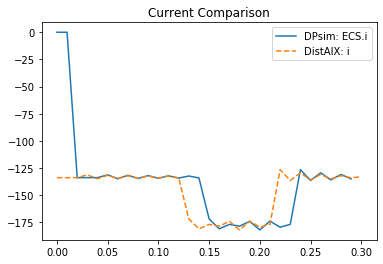

In [19]:
plt.plot(ts1.time, ts1.values)
plt.plot(ts2.time, ts2.values, linestyle = "--")
plt.title("Current Comparison")
plt.legend(["DPsim: " + key_dpsim, "DistAIX: " + key_distaix])